In [291]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\Users\edwar\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time', 'sin', 'cos']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [292]:
import numpy as np
from math import cos, sin
from numpy import array, linspace, copy
import matplotlib.pyplot as plt

def clamp(num, min_value, max_value):
   return max(min(num, max_value), min_value)

In [293]:
# Perfect sensor
def sense(x):
    return x

In [294]:
gravity = -1 #array([0 , -1])
def simulate(Δt, x, u): #[x,y,theta,dx,dy,dtheta]
    np.clip(u,0,2)
    x[3] += Δt*(u[0]+u[1]) * sin(x[2])
    x[4] += Δt*(u[0]+u[1]) * cos(x[2]) + Δt*gravity
    x[5] += Δt*(u[0]-u[1])
    
    x[0:3] += Δt * x[3:] #change position

    if x[1] <=0: #assert floor
        x[4] = -1*x[4]
    '''
    u[0] = clamp(u[0],-2,2)
    u[1] = clamp(u[1],0,2)
    x[2:] += Δt*u #change velocity 
    x[2:] += Δt*gravity #create gravity force
    x[0:2] += Δt * x[2:] #change position
    if x[1] <=0: #assert floor
        x[3] = -1*x[3]
    '''
    return x

In [295]:
#power = 3
target = array([3 , 5, 0])
Kp = 5
Kd = 5
Vp = .05
Vd = .5
Vod = .1

def control(t, y): #[x,y,theta,dx,dy,dtheta]

    ### WRITE YOUR CONTROL POLICY HERE:
    thrust = Kp*(target - y[0:3]) + Kd*(-1* y[3:])
    v = Vp * (target[0]-y[0])# - y[2] * Vd - y[3] * Vod
    print(v)
    thrust += 0
    

    motor = array([thrust[1]+v, thrust[1]-v])
    
    
    return motor#array([ux, uy])

In [296]:
tf = 10
Δt = .1  # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([2., 1., 0, 0, 0, 0])#[x,y,theta,dx,dy,dtheta]
x_log = [copy(x)]
for t in time:
    y = sense(x)
    u = control(t, y)  
    prev = copy(y)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))

x_log = array(x_log)
print(x_log)


0.05
0.05
0.050001449999758335
0.05000666499626166
0.050018357022437954
0.050039264784421146
0.05007186435123963
0.05011814681515523
0.05017945094610282
0.05025634066724513
0.05034851872638718
0.05045476926694514
0.05057292314272363
0.05069984079818379
0.050831408371442746
0.05096254338902117
0.05108720702488109
0.05119842040498543
0.051288282864105986
0.05134799041401733
0.051367852970304044
0.05133730911633819
0.05124493736400945
0.05107846300694601
0.050824759757718066
0.050469845419407106
0.04999887086658564
0.049396101602918074
0.04864489112308295
0.04772764523541169
0.046625776397426516
0.04531964697717135
0.04378850017554264
0.042010377124157366
0.039962018403668066
0.0376187479013437
0.03495433653501858
0.03194084290225776
0.02854842735614147
0.02474513534821996
0.020496645099669242
0.01576597374825537
0.010513135058182322
0.004694740564593847
-0.0017364653417920152
-0.008832147376815659
-0.016649010915676478
-0.025249537179639292
-0.03470283732105568
-0.045085641238737865
-0.0

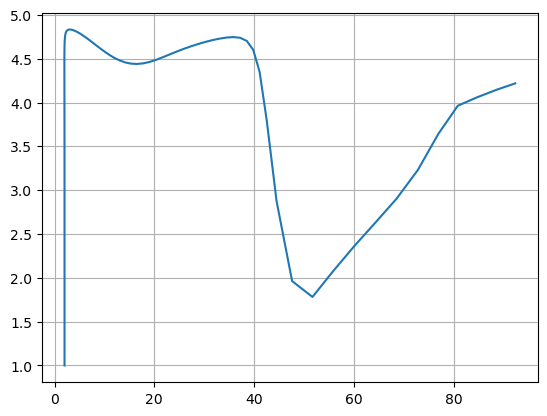

In [297]:
plt.grid()
plt.plot(x_log.T[0], x_log.T[1])#x_log[:,1])#, x_log[:,1])

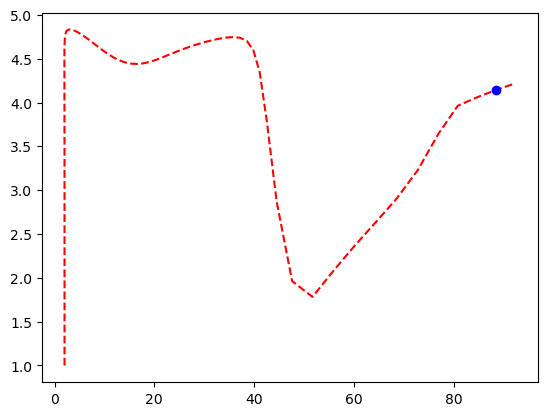

In [298]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plt.plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plt.plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())